In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.decomposition import PCA


In [3]:
df_wine=pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data',header=None)
df_wine.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [5]:
df_wine.isnull().sum()

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
dtype: int64

<AxesSubplot:>

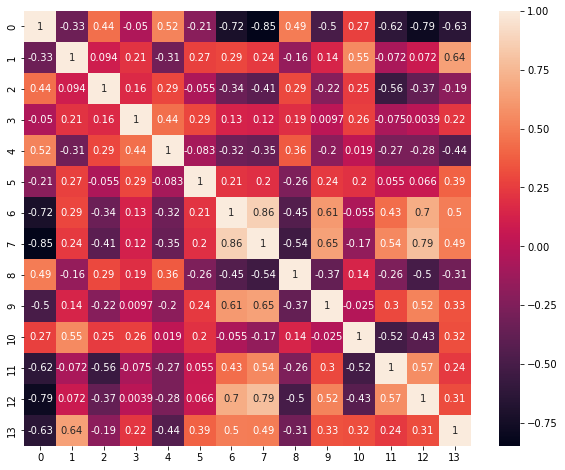

In [9]:
plt.figure(figsize=(10,8))
sns.heatmap(df_wine.corr(),annot=True)

In [11]:
df_wine[0].value_counts()

2    71
1    59
3    48
Name: 0, dtype: int64

In [74]:
X,y=df_wine.iloc[:,1:],df_wine.iloc[:,0]

In [75]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,
                                               test_size=0.2,random_state=0)

In [76]:
X_train

,1,2,3,4,5,6,7,8,9,10,11,12,13
161,13.69,3.26,2.54,20.0,107,1.83,0.56,0.50,0.80,5.88,0.96,1.82,680
92,12.69,1.53,2.26,20.7,80,1.38,1.46,0.58,1.62,3.05,0.96,2.06,495
94,11.62,1.99,2.28,18.0,98,3.02,2.26,0.17,1.35,3.25,1.16,2.96,345
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
24,13.50,1.81,2.61,20.0,96,2.53,2.61,0.28,1.66,3.52,1.12,3.82,845
...,...,...,...,...,...,...,...,...,...,...,...,...,...
103,11.82,1.72,1.88,19.5,86,2.50,1.64,0.37,1.42,2.06,0.94,2.44,415
67,12.37,1.17,1.92,19.6,78,2.11,2.00,0.27,1.04,4.68,1.12,3.48,510
117,12.42,1.61,2.19,22.5,108,2.00,2.09,0.34,1.61,2.06,1.06,2.96,345
47,13.90,1.68,2.12,16.0,101,3.10,3.39,0.21,2.14,6.10,0.91,3.33,985


In [77]:
y_train

161    3
92     2
94     2
174    3
24     1
      ..
103    2
67     2
117    2
47     1
172    3
Name: 0, Length: 142, dtype: int64

In [67]:
from sklearn.preprocessing import StandardScaler
std=StandardScaler()
Xtrainstd=std.fit_transform(X_train)
Xteststd=std.transform(X_test)

In [68]:
#covariance matrix

cov_matrix=np.cov(Xtrainstd.T)
eigen_val,eigen_vec=np.linalg.eig(cov_matrix)
print(f'Eigen Values: {eigen_val} \n\n Eigen Vectors: {eigen_vec}')

Eigen Values: [4.82894083 2.52920254 1.40778607 0.97170248 0.81772614 0.64269609
 0.53904343 0.09124383 0.16401706 0.32677915 0.30227988 0.22672631
 0.24405475] 

 Eigen Vectors: [[ 0.12959991  0.49807323 -0.1383815   0.24199813  0.17279973  0.17873289
   0.09000534  0.08850175  0.26402263  0.48169166 -0.43303897  0.2793571
   0.11125519]
 [-0.24464064  0.23168482  0.08422378  0.03501265 -0.58431883  0.50041745
   0.44755409 -0.02912494 -0.05505047  0.08986837  0.18860336 -0.13627368
  -0.14108829]
 [-0.01018912  0.31496874  0.63988217  0.00978418  0.26362755  0.16064973
  -0.06751248  0.1213575  -0.01688933 -0.37909702  0.0325249   0.32898212
  -0.35109208]
 [-0.24051579 -0.02321825  0.62195017 -0.0922443   0.02622374 -0.0559492
  -0.24334226 -0.08600336  0.05553175  0.51955024  0.13288449 -0.22277751
   0.36816801]
 [ 0.12649451  0.25841951  0.02997765 -0.82788074  0.08753303 -0.07810127
   0.30855505 -0.09468425 -0.06758476 -0.07256418 -0.26176222 -0.13059365
   0.13263758]
 [ 0.389

In [87]:
pca=PCA(n_components=3)

Xtrain_pca=pca.fit_transform(Xtrainstd)
Xtest_pca=pca.fit_transform(Xteststd)
y_train

161    3
92     2
94     2
174    3
24     1
      ..
103    2
67     2
117    2
47     1
172    3
Name: 0, Length: 142, dtype: int64

In [84]:
Xtrain_pca

array([[-2.17884511e+00, -1.07218467e+00,  7.25656631e-02],
       [-1.80819239e+00,  1.57822344e+00,  8.96476572e-03],
       [ 1.09829474e+00,  2.22124345e+00, -1.09329403e-01],
       [-2.55584748e+00, -1.66210369e+00, -1.94662741e-01],
       [ 1.85698063e+00,  2.41573166e-01, -1.00300685e+00],
       [ 2.58288576e+00, -1.37668170e+00, -1.47327363e+00],
       [ 8.72876119e-01,  2.25618512e+00, -1.72526292e-01],
       [-4.18384029e-01,  2.35415681e+00,  1.48519692e+00],
       [-3.04977245e-01,  2.27659433e+00, -1.06177089e+00],
       [ 2.14082532e+00, -1.10052871e+00,  1.98193318e-01],
       [-2.98136465e+00, -2.47159183e-01,  1.13626102e+00],
       [ 1.96188242e+00,  1.25407738e+00, -4.17714193e-01],
       [-2.16177795e+00, -9.75966550e-01,  1.46325283e+00],
       [ 2.21976084e+00, -2.39507167e+00, -8.20612727e-01],
       [-2.30179529e+00, -2.05791962e-01,  8.02289900e-01],
       [-3.00953827e+00, -2.79141212e-01,  9.33830035e-01],
       [ 2.63443473e+00, -8.68313119e-01

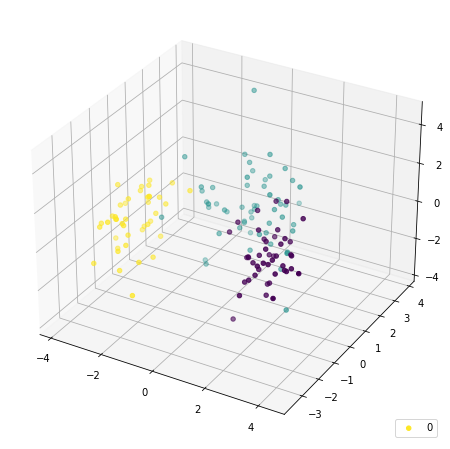

In [101]:
fig=plt.figure(figsize=(10,8))
ax = fig.add_subplot(projection='3d')
ax.scatter(Xtrain_pca[:,0],Xtrain_pca[:,1], Xtrain_pca[:,2], c=y_train)
plt
plt.show()

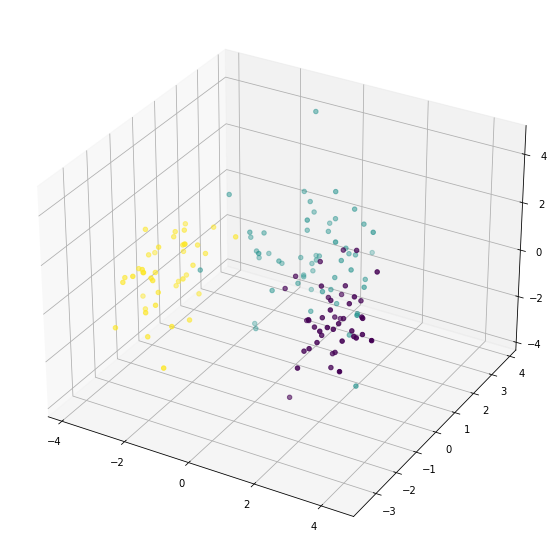

In [109]:
fig=plt.figure(figsize=(10,10))
ax=fig.add_subplot(projection='3d')
ax.scatter(Xtrain_pca[:,0],Xtrain_pca[:,1],Xtrain_pca[:,2],c=y_train)
plt.
plt.show()